# Let's Use Pandas!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

## Agenda

SWBAT:

- use `pandas` to read in .csv files;
- interact with and manipulate Series and DataFrames;
- identify and deal with N/A values;
- visualize data using built in dataframe methods and `matplotlib`

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a .csv file.

Read about this dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [2]:
heart_df = pd.read_csv('data/heart.csv')

The output of the `.read_csv()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [3]:
type(heart_df)

pandas.core.frame.DataFrame

In [4]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Notice the name of the last column!

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [5]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column!

Both Series and DataFrames have an *index* as well:

In [6]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [7]:
age_series.index

RangeIndex(start=0, stop=303, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [8]:
heart_df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Basic DataFrame Attributes and Methods

### `.head()`

In [9]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### `.tail()`

In [10]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### `.info()`

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### `.describe()`

In [12]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### `.dtypes`

In [13]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### `.shape`

In [14]:
heart_df.shape

(303, 14)

## Adding to a DataFrame


### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [15]:
extra_rows = {'age': [40, 30], 'sex': [1, 0], 'cp': [0, 0], 'trestbps': [120, 130],
              'chol': [240, 200],
             'fbs': [0, 0], 'restecg': [1, 0], 'thalach': [120, 122], 'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 'slope': [1, 1], 'ca': [0, 1], 'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [16]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame().from_dict(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [17]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.

heart_augmented = pd.concat([heart_df, missing],
                           ignore_index=True)

In [18]:
# Let's check the end to make sure we were successful!

heart_augmented.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
303,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
304,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [19]:
heart_augmented['test'] = 0

I can also add columns whose values are functions of existing columns.

Suppose I want to multiply the cholesterol column ("chol") by the max heart rate column ("thalach"):

In [20]:
heart_augmented['chol+heart'] = heart_augmented['chol'] * heart_augmented['thalach']

## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [21]:
heart_augmented[heart_augmented['age'] >= 70]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+heart
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0,48924
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0,34450
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0,32549
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,0,22852
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,0,35035
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,18625
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,21750
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,0,35098
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,0,49248
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,30128


Use '&' for "and" and '|' for "or".

In [22]:
# Display the patients who are 70 or over as well as the patients whose
# trestbps score is greater than 170.



### `.loc` and `.iloc`

> .loc is INCLUSIVE .iloc is NOT INCLUSIVE!

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [23]:
heart_augmented.loc

In [24]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172
9,57,150


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [25]:
heart_augmented.iloc

In [26]:
heart_augmented.iloc[3, 0]

56

In [28]:
# How would we get the same slice as just above by using .iloc() instead of .loc()?
heart_augmented.iloc[:8, [0,3]]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120


## Statistics

### `.mean()`

In [29]:
heart_augmented.mean()

age              54.239344
sex               0.681967
cp                0.960656
trestbps        131.580328
chol            246.091803
fbs               0.147541
restecg           0.527869
thalach         149.459016
exang             0.327869
oldpeak           1.036393
slope             1.396721
ca                0.727869
thal              2.314754
target            0.540984
test              0.000000
chol+heart    36773.724590
dtype: float64

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [30]:
heart_augmented.min()

age              29.0
sex               0.0
cp                0.0
trestbps         94.0
chol            126.0
fbs               0.0
restecg           0.0
thalach          71.0
exang             0.0
oldpeak           0.0
slope             0.0
ca                0.0
thal              0.0
target            0.0
test              0.0
chol+heart    15065.0
dtype: float64

### `.max()`

In [31]:
heart_augmented.max()

age              77.0
sex               1.0
cp                3.0
trestbps        200.0
chol            564.0
fbs               1.0
restecg           2.0
thalach         202.0
exang             1.0
oldpeak           6.2
slope             2.0
ca                4.0
thal              3.0
target            1.0
test              0.0
chol+heart    90240.0
dtype: float64

## Series Methods

### `.value_counts()`

How many different values does have slope have? What about sex? And target?

In [32]:
heart_augmented['slope'].value_counts()

2    142
1    142
0     21
Name: slope, dtype: int64

### `.sort_values()`

In [33]:
heart_augmented['age'].sort_values()

72     29
304    30
58     34
125    34
65     35
       ..
25     71
60     71
129    74
144    76
238    77
Name: age, Length: 305, dtype: int64

## The Titanic Dataset

In [34]:
titanic = pd.read_csv('data/titanic.csv')

In [35]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
titanic.shape

(891, 12)

In [37]:
titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.800,NaN,S


### Renaming Columns

In [38]:
titanic.rename({'SibSp':'siblings_and_spouses'}, axis=1).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,siblings_and_spouses,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Dealing with NAs / NaNs

Values can be missing for lots of reasons, so we'll have lots of occasions to deal with this issue. And we'll need to deal with it: In general we can't have null values if we're going to use our data for building and testing models.

There are several ways we might go about it. The simplest strategy is just to drop the rows or columns that contain the nulls.

In [39]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are lots of nulls in "Cabin", so we might just drop that column altogether. By contrast there are only a couple nulls in "Embarked", so in that case we might keep the column but just drop the rows that have nulls in that column.

What about "Age"?

Another strategy is to keep the offending cells but somehow fill them in artificially. This is obviously a bit risky, since we are in effect just making up data, but sometimes it makes sense to fill in null values with the mean or the median of the relevant column. This sort of "filling-in" strategy is called **imputation**.

Let's try filling in the "Age" nulls with the median of that column.

Then we could write:

In [40]:
no_emb = titanic.drop('Cabin', axis=1)
no_emb.shape

(891, 11)

In [41]:
no_emb['Age'] = no_emb['Age'].fillna(np.nanmedian(no_emb['Age']))

In [42]:
no_nulls = no_emb.dropna()
no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Plotting

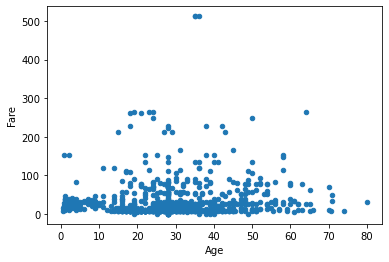

In [43]:
no_nulls.plot('Age', 'Fare', kind='scatter');

## Let's find a .csv file online and experiment with it.

I'm going to head to [dataportals.org](https://dataportals.org) to find a .csv file.